# Import necessary libraries

In [1]:
from adversarial.imageclassification.pgd import PGD
from adversarial.imageclassification.attack import run_attack,plot_adversarial_sample
from explanation.saliency.saliency_zoo import agi,run_explanation,caculate_insert_deletion
from mutants.image_classification import LabelError,NoisePerturb
from models.densenet121_cifar10 import ComposedModel as DenseNet121
from models.googlenet_cifar10 import ComposedModel as GoogleNet
from models.inception_v3_cifar10 import ComposedModel as InceptionV3
from models.mobilenet_v2_cifar10 import ComposedModel as MobileNetV2
from models.resnet50_cifar10 import ComposedModel as ResNet50
from models.vgg16_bn_cifar10 import ComposedModel as VGG16_bn
from datasets.cifar10 import load_dataset,BATCH_SIZE
from torch.utils.data import DataLoader
from pruning.taylor import Taylor
from indicator.builtin import metric
from utils import check_device
from pruning.utils import analyze_pruning
from explanation.visualization import plot
device = check_device()

# Initialize the model

In [2]:
densenet121 = DenseNet121().get_model()
googlenet = GoogleNet().get_model()
inception_v3 = InceptionV3().get_model()
mobilenet_v2 = MobileNetV2().get_model()
resnet50 = ResNet50().get_model()
vgg16_bn = VGG16_bn().get_model()

FileNotFoundError: [Errno 2] No such file or directory: 'ckpt/densenet121.pt'

# Load the data

In [ ]:
train_dataset, test_dataset = load_dataset()
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


# Mutate the data

#### LabelError use p = 0.1

In [ ]:
labelerror = LabelError(0.1,num_classes=10)
labelerror_dataloader = DataLoader(test_dataloader.dataset,batch_size=BATCH_SIZE,shuffle=False,collate_fn=labelerror)

In [ ]:
# metric labelerror data
metrics_densenet121, class_report_densenet121 = metric(densenet121,labelerror_dataloader,num_classes=10)
metrics_googlenet, class_report_googlenet = metric(googlenet,labelerror_dataloader,num_classes=10)
metrics_inception_v3, class_report_inception_v3 = metric(inception_v3,labelerror_dataloader,num_classes=10)
metrics_mobilenet_v2, class_report_mobilenet_v2 = metric(mobilenet_v2,labelerror_dataloader,num_classes=10)
metrics_resnet50, class_report_resnet50 = metric(resnet50,labelerror_dataloader,num_classes=10)
metrics_vgg16_bn, class_report_vgg16_bn = metric(vgg16_bn,labelerror_dataloader,num_classes=10)

In [ ]:
metrics_resnet50

,Metric,Value
0,Accuracy,0.8439
1,Loss,1.6318
2,TPR,0.8440
3,TNR,0.9827
4,PPV,0.8439
5,NPV,0.9827
6,FPR,0.0173
7,FNR,0.1560
8,FDR,0.1561
9,ROC_AUC,0.9413


In [ ]:
class_report_resnet50

,precision,recall,f1-score,support
0,0.8419,0.8632,0.8524,987.0000
1,0.8549,0.8731,0.8639,985.0000
2,0.8391,0.8248,0.8319,993.0000
3,0.7986,0.7655,0.7817,1015.0000
4,0.8426,0.8409,0.8417,1012.0000
5,0.7971,0.8318,0.8141,987.0000
6,0.8597,0.8495,0.8546,1003.0000
7,0.8735,0.8569,0.8651,999.0000
8,0.8577,0.8637,0.8607,1005.0000
9,0.8743,0.8708,0.8725,1014.0000


#### Noiseperturb use std = 0.05

In [ ]:
noiseperturb = NoisePerturb(0.05)
noiseperturb_dataloader = DataLoader(test_dataloader.dataset,batch_size=BATCH_SIZE,shuffle=False,collate_fn=noiseperturb)

In [ ]:
# metric noiseperturb data
metrics_densenet121, class_report_densenet121 = metric(densenet121,noiseperturb_dataloader,num_classes=10)
metrics_googlenet, class_report_googlenet = metric(googlenet,noiseperturb_dataloader,num_classes=10)
metrics_inception_v3, class_report_inception_v3 = metric(inception_v3,noiseperturb_dataloader,num_classes=10)
metrics_mobilenet_v2, class_report_mobilenet_v2 = metric(mobilenet_v2,noiseperturb_dataloader,num_classes=10)
metrics_resnet50, class_report_resnet50 = metric(resnet50,noiseperturb_dataloader,num_classes=10)
metrics_vgg16_bn, class_report_vgg16_bn = metric(vgg16_bn,noiseperturb_dataloader,num_classes=10)

In [ ]:
metrics_resnet50

,Metric,Value
0,Accuracy,0.7837
1,Loss,1.6942
2,TPR,0.7837
3,TNR,0.9760
4,PPV,0.8300
5,NPV,0.9765
6,FPR,0.0240
7,FNR,0.2163
8,FDR,0.1700
9,ROC_AUC,0.9634


In [ ]:
class_report_resnet50

,precision,recall,f1-score,support
0,0.9380,0.7110,0.8089,1000.0000
1,0.9665,0.8940,0.9288,1000.0000
2,0.7348,0.8090,0.7701,1000.0000
3,0.8276,0.4850,0.6116,1000.0000
4,0.6955,0.8610,0.7694,1000.0000
5,0.9120,0.5700,0.7015,1000.0000
6,0.4942,0.9740,0.6557,1000.0000
7,0.9680,0.7570,0.8496,1000.0000
8,0.8779,0.8630,0.8704,1000.0000
9,0.8855,0.9130,0.8991,1000.0000


# Pruing

#### pruning model use taylor

In [ ]:
taylor = Taylor(pruning_ratio=0.6)

In [ ]:
pruned_densenet121 = taylor(densenet121,train_dataloader)
pruned_googlenet = taylor(googlenet,train_dataloader)
pruned_inception_v3 = taylor(inception_v3,train_dataloader)
pruned_mobilenet_v2 = taylor(mobilenet_v2,train_dataloader)
pruned_resnet50 = taylor(resnet50,train_dataloader)
pruned_vgg16_bn = taylor(vgg16_bn,train_dataloader)

  0%|          | 1/391 [00:00<00:51,  7.59it/s]

100%|██████████| 30/30 [00:00<00:00, 4424.68it/s]


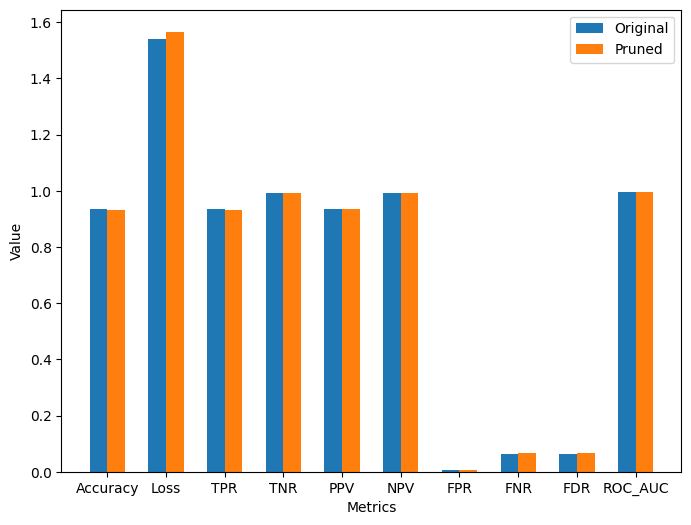

In [ ]:
analyze_pruning(resnet50,pruned_resnet50,test_dataloader)

# Adversarial Attack

#### Transferability on unpruned model use adv examples generated by unpruned model

In [ ]:
adv_data,original_data = run_attack(resnet50,method=PGD,dataloader=test_dataloader,transfer_models={"densenet121":densenet121,"googlenet":googlenet,"inception_v3":inception_v3,"mobilenet_v2":mobilenet_v2,"vgg16_bn":vgg16_bn},eps=8/255,alpha=2/255,steps=10)

Succeed rate: 0.9865999817848206
Transferability:
densenet121: 0.5939000248908997
googlenet: 0.5559999942779541
inception_v3: 0.6064000129699707
mobilenet_v2: 0.6736999750137329
vgg16_bn: 0.5608000159263611


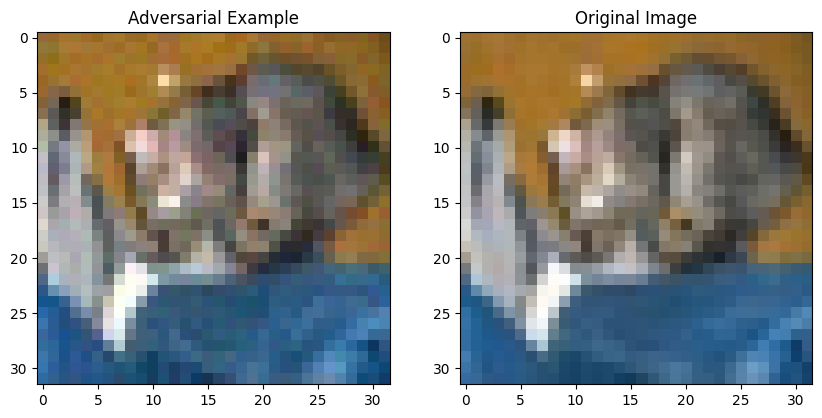

In [ ]:
plot_adversarial_sample(adv_data[0],original_data[0])

#### Transferability on pruned model use adv examples generated by unpruned model

In [ ]:
adv_data,original_data = run_attack(resnet50,method=PGD,dataloader=test_dataloader,transfer_models={"pruned_densenet121":pruned_densenet121,"pruned_googlenet":pruned_googlenet,"pruned_inception_v3":pruned_inception_v3,"pruned_mobilenet_v2":pruned_mobilenet_v2,"pruned_vgg16_bn":pruned_vgg16_bn},eps=8/255,alpha=2/255,steps=10)

Succeed rate: 0.986299991607666
Transferability:
pruned_densenet121: 0.593999981880188
pruned_googlenet: 0.5597000122070312
pruned_inception_v3: 0.6067000031471252
pruned_mobilenet_v2: 0.6722000241279602
pruned_vgg16_bn: 0.570900022983551


#### Transferability on unpruned model use adv examples generated by pruned model

In [ ]:
adv_data,original_data = run_attack(pruned_resnet50,method=PGD,dataloader=test_dataloader,transfer_models={"densenet121":densenet121,"googlenet":googlenet,"inception_v3":inception_v3,"mobilenet_v2":mobilenet_v2,"vgg16_bn":vgg16_bn},eps=8/255,alpha=2/255,steps=10)

Succeed rate: 0.9930999875068665
Transferability:
densenet121: 0.6625999808311462
googlenet: 0.6184999942779541
inception_v3: 0.6658999919891357
mobilenet_v2: 0.7321000099182129
vgg16_bn: 0.6266999840736389


#### Transferability on pruned model use adv examples generated by pruned model

In [ ]:
adv_data,original_data = run_attack(pruned_resnet50,method=PGD,dataloader=test_dataloader,transfer_models={"pruned_densenet121":pruned_densenet121,"pruned_googlenet":pruned_googlenet,"pruned_inception_v3":pruned_inception_v3,"pruned_mobilenet_v2":pruned_mobilenet_v2,"pruned_vgg16_bn":pruned_vgg16_bn},eps=8/255,alpha=2/255,steps=10)

Succeed rate: 0.9923999905586243
Transferability:
pruned_densenet121: 0.6607000231742859
pruned_googlenet: 0.6201000213623047
pruned_inception_v3: 0.6622999906539917
pruned_mobilenet_v2: 0.7312999963760376
pruned_vgg16_bn: 0.6298999786376953


# Model Explaination

#### Explaination on unpruned model

In [ ]:
attributions,all_data = run_explanation(resnet50,test_dataloader,agi,topk=1,num_classes=10)

100%|██████████| 79/79 [01:02<00:00,  1.26it/s]


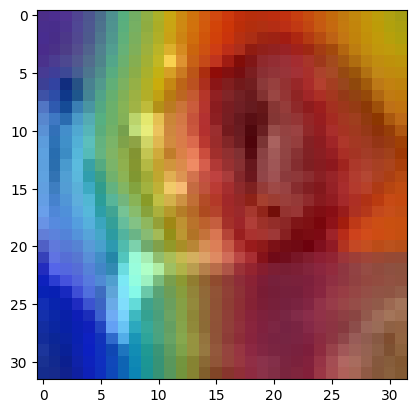

In [ ]:
plot(attributions[0:1],test_dataset[0][0].unsqueeze(0))

In [ ]:
caculate_insert_deletion(resnet50,all_data,attributions,32*32,10)

Inserting pixels: 100%|██████████| 33/33 [00:27<00:00,  1.18it/s]

Insertion:  0.38571213381254504
Deletion:  0.19580324212971326


##### Transferability on unpruned model

In [ ]:
caculate_insert_deletion(vgg16_bn,all_data,attributions,32*32,10)

Inserting pixels: 100%|██████████| 33/33 [00:17<00:00,  1.91it/s]

Insertion:  0.3397182579661624
Deletion:  0.18278575475659936


##### Transferability on pruned model

In [ ]:
caculate_insert_deletion(pruned_vgg16_bn,all_data,attributions,32*32,10)

Inserting pixels: 100%|██████████| 33/33 [00:17<00:00,  1.92it/s]

Insertion:  0.3079782703520023
Deletion:  0.17129055037723437


#### Explaination on pruned model

In [ ]:
attributions,all_data = run_explanation(pruned_resnet50,test_dataloader,agi,topk=1,num_classes=10)

100%|██████████| 79/79 [01:00<00:00,  1.30it/s]


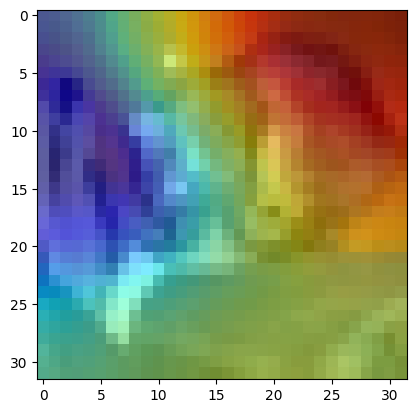

In [ ]:
plot(attributions[0:1],test_dataset[0][0].unsqueeze(0))

In [ ]:
caculate_insert_deletion(pruned_resnet50,all_data,attributions,32*32,10)

Inserting pixels: 100%|██████████| 33/33 [00:27<00:00,  1.20it/s]

Insertion:  0.36796705675249597
Deletion:  0.19033813336986208


##### Transferability on unpruned model

In [ ]:
caculate_insert_deletion(vgg16_bn,all_data,attributions,32*32,10)

Inserting pixels: 100%|██████████| 33/33 [00:17<00:00,  1.92it/s]

Insertion:  0.338391897702723
Deletion:  0.18015595910379192


##### Transferability on pruned model

In [ ]:
caculate_insert_deletion(pruned_vgg16_bn,all_data,attributions,32*32,10)

Inserting pixels: 100%|██████████| 33/33 [00:17<00:00,  1.93it/s]

Insertion:  0.30639018712236005
Deletion:  0.16863562107675997
